# 3. GradCAM Visualization
Visualize which parts of the image the model is focusing on.

In [3]:

import torch
import torchvision.transforms as transforms
import cv2
import matplotlib.pyplot as plt
from utils.gradcam import GradCAM, show_cam_on_image


In [4]:

import torch

if torch.cuda.is_available():
    device = torch.device('cuda')
    print(f'Using CUDA on {torch.cuda.get_device_name(0)}')
elif torch.backends.mps.is_available():
    device = torch.device('mps')
    print('Using MPS (Metal Performance Shaders) on Apple Silicon')
else:
    device = torch.device('cpu')
    print('Using CPU')


Using MPS (Metal Performance Shaders) on Apple Silicon


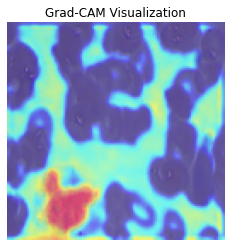

In [8]:

from train_model import SimpleCNN
from PIL import Image


model = SimpleCNN(num_classes=4)
model.load_state_dict(torch.load('../models/best_model.pth', map_location=device))
model.to(device)
model.eval()

target_layer = model.conv2
grad_cam = GradCAM(model=model, target_layer=target_layer)

img_path = '../data/test/BloodImage_00001.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert to PIL Image
img_pil = Image.fromarray(img)

# Transform
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

img_tensor = transform(img_pil).unsqueeze(0).to(device)
cam = grad_cam(img_tensor)
# Resize original image to match GradCAM
img_resized = cv2.resize(img, (128, 128))  # Now img is also 128x128

visualization = show_cam_on_image(img_resized / 255., cam, use_rgb=True)

plt.imshow(visualization)
plt.axis('off')
plt.title('Grad-CAM Visualization')
plt.savefig('../results/gradcam_sample.jpg')
plt.show()
